In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

c:\Program Files\Python312\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


###### https://medium.com/@roshmitadey/understanding-principal-component-analysis-pca-d4bb40e12d33
###### https://365datascience.com/tutorials/python-tutorials/pca-k-means/

### The Need for Dimensionality Reduction
- Computational Complexity: As the number of features increases, the computational resources and time required for analysis and modeling grow exponentially.

- Overfitting: Models can become overly complex and fit the noise in the data, leading to poor generalization on new, unseen data.

- Difficulty in Visualization: It becomes challenging to visualize and understand data in more than three 
dimensions.

- Redundancy: Some features may be highly correlated, meaning they convey similar information. This redundancy can be eliminated without significant loss of information.

In [221]:
data = pd.read_csv("Country-data.csv")

In [222]:
df = pd.DataFrame(data)

In [223]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [225]:
df.shape

(167, 10)

In [226]:
df.duplicated().sum()

0

In [227]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [230]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

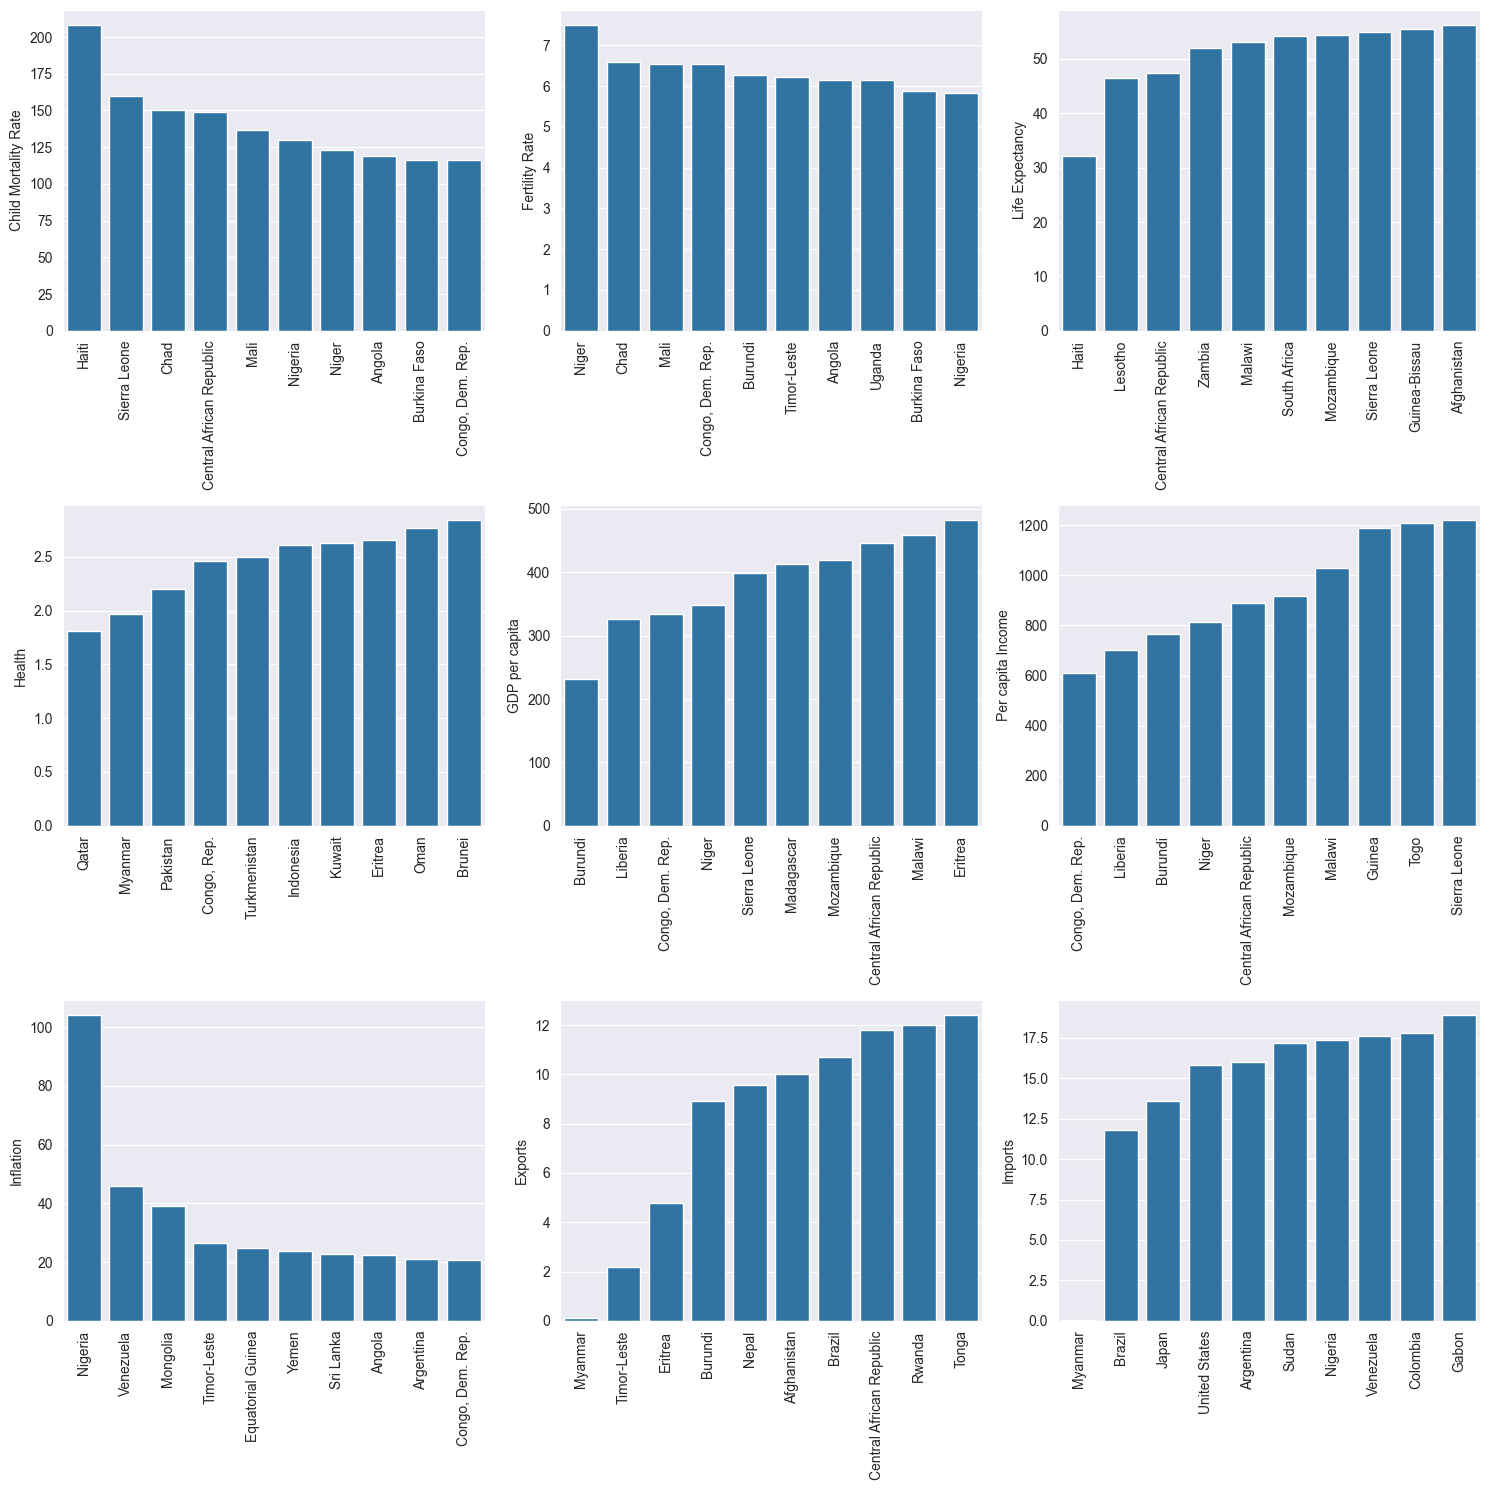

In [231]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = (
    data[["country", "child_mort"]].sort_values("child_mort", ascending=False).head(10)
)
plt1 = sns.barplot(x="country", y="child_mort", data=top10_child_mort, ax=axs[0, 0])
plt1.set(xlabel="", ylabel="Child Mortality Rate")

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = (
    data[["country", "total_fer"]].sort_values("total_fer", ascending=False).head(10)
)
plt1 = sns.barplot(x="country", y="total_fer", data=top10_total_fer, ax=axs[0, 1])
plt1.set(xlabel="", ylabel="Fertility Rate")

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = (
    data[["country", "life_expec"]].sort_values("life_expec", ascending=True).head(10)
)
plt1 = sns.barplot(x="country", y="life_expec", data=bottom10_life_expec, ax=axs[0, 2])
plt1.set(xlabel="", ylabel="Life Expectancy")

# Health :Total health spending as %age of Total GDP.

bottom10_health = (
    data[["country", "health"]].sort_values("health", ascending=True).head(10)
)
plt1 = sns.barplot(x="country", y="health", data=bottom10_health, ax=axs[1, 0])
plt1.set(xlabel="", ylabel="Health")

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = data[["country", "gdpp"]].sort_values("gdpp", ascending=True).head(10)
plt1 = sns.barplot(x="country", y="gdpp", data=bottom10_gdpp, ax=axs[1, 1])
plt1.set(xlabel="", ylabel="GDP per capita")

# Per capita Income : Net income per person

bottom10_income = (
    data[["country", "income"]].sort_values("income", ascending=True).head(10)
)
plt1 = sns.barplot(x="country", y="income", data=bottom10_income, ax=axs[1, 2])
plt1.set(xlabel="", ylabel="Per capita Income")


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = (
    data[["country", "inflation"]].sort_values("inflation", ascending=False).head(10)
)
plt1 = sns.barplot(x="country", y="inflation", data=top10_inflation, ax=axs[2, 0])
plt1.set(xlabel="", ylabel="Inflation")


bottom10_exports = (
    data[["country", "exports"]].sort_values("exports", ascending=True).head(10)
)
plt1 = sns.barplot(x="country", y="exports", data=bottom10_exports, ax=axs[2, 1])
plt1.set(xlabel="", ylabel="Exports")


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = (
    data[["country", "imports"]].sort_values("imports", ascending=True).head(10)
)
plt1 = sns.barplot(x="country", y="imports", data=bottom10_imports, ax=axs[2, 2])
plt1.set(xlabel="", ylabel="Imports")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig("eda")
plt.show()

In [128]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [228]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<Axes: >

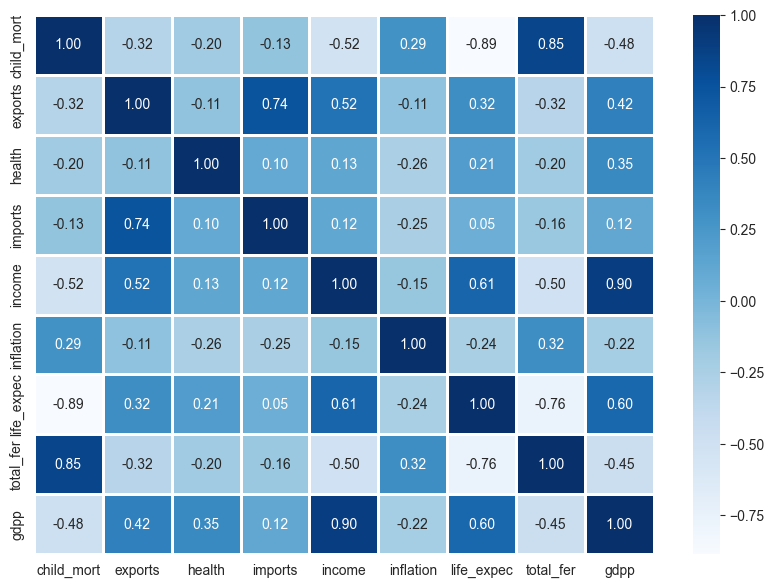

In [130]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", linewidth=0.75, cmap="Blues")

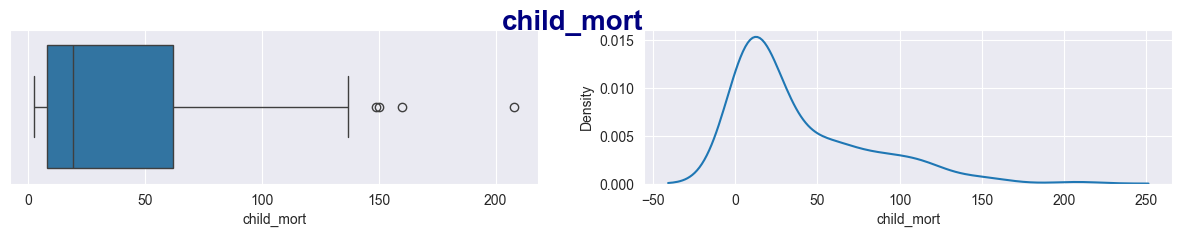

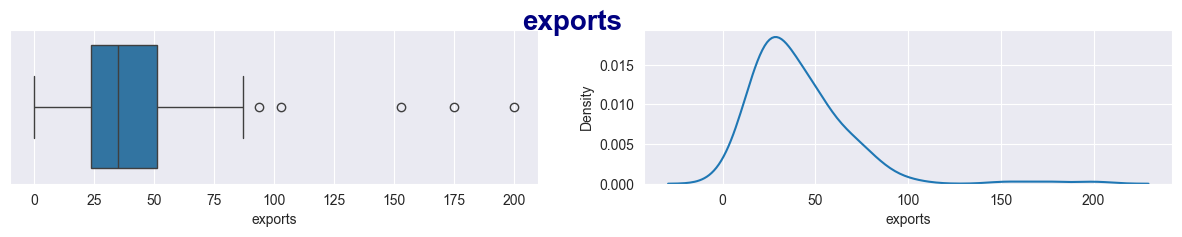

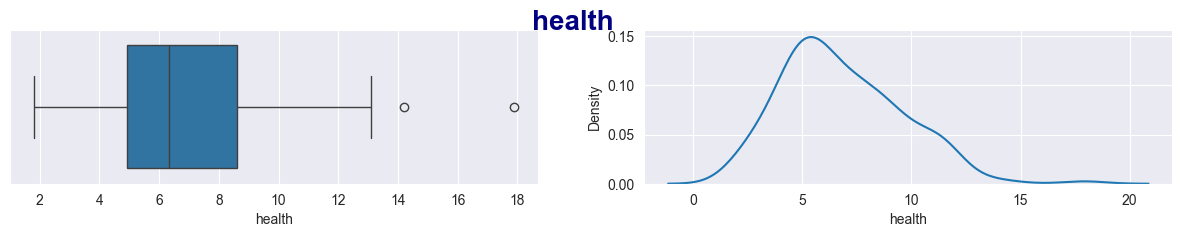

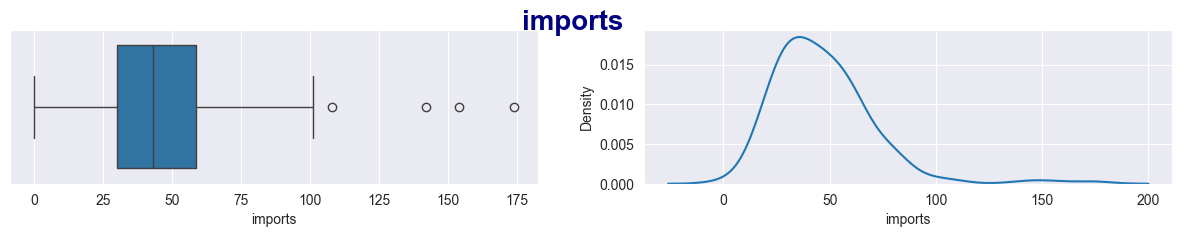

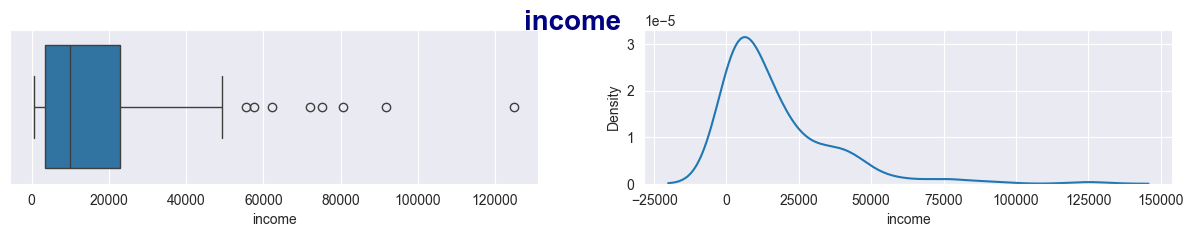

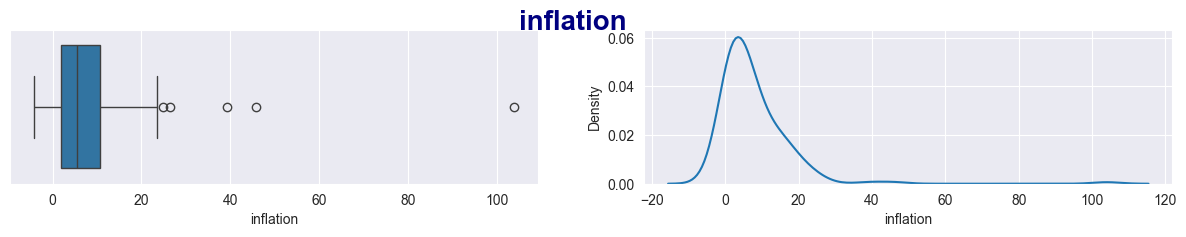

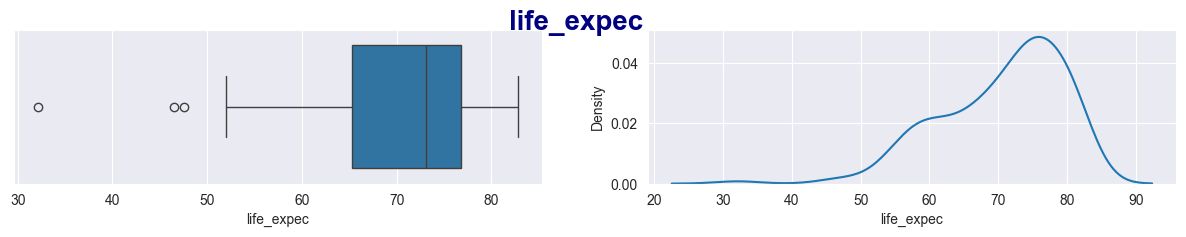

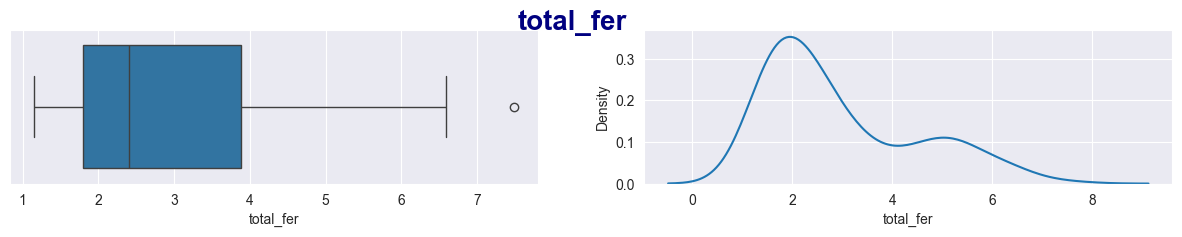

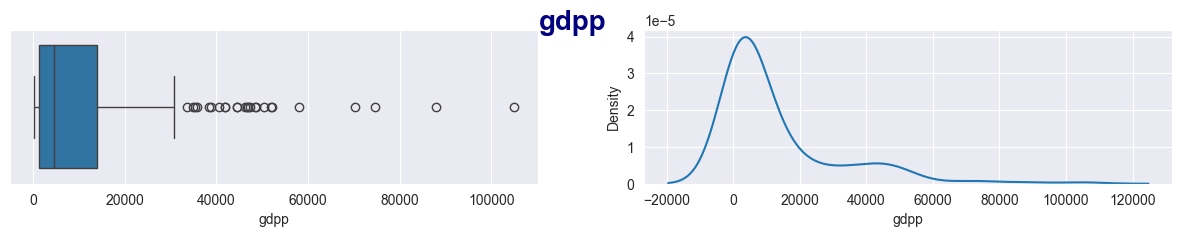

In [234]:
colmns = df.columns
for i in range(1, 10):
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(colmns[i], fontsize=20, fontweight="bold", color="navy")
    sns.boxplot(x=colmns[i], data=df, ax=ax[0])
    sns.kdeplot(df[colmns[i]], ax=ax[1])

In [235]:
percentiles = df["child_mort"].quantile([0.05, 0.95]).values
df["child_mort"][df["child_mort"] <= percentiles[0]] = percentiles[0]
df["child_mort"][df["child_mort"] >= percentiles[1]] = percentiles[1]

percentiles = df["health"].quantile([0.05, 0.95]).values
df["health"][df["health"] <= percentiles[0]] = percentiles[0]
df["health"][df["health"] >= percentiles[1]] = percentiles[1]

percentiles = df["life_expec"].quantile([0.05, 0.95]).values
df["life_expec"][df["life_expec"] <= percentiles[0]] = percentiles[0]
df["life_expec"][df["life_expec"] >= percentiles[1]] = percentiles[1]

percentiles = df["total_fer"].quantile([0.05, 0.95]).values
df["total_fer"][df["total_fer"] <= percentiles[0]] = percentiles[0]
df["total_fer"][df["total_fer"] >= percentiles[1]] = percentiles[1]

percentiles = df["income"].quantile([0.05, 0.95]).values
df["income"][df["income"] <= percentiles[0]] = percentiles[0]
df["income"][df["income"] >= percentiles[1]] = percentiles[1]

percentiles = df["inflation"].quantile([0.05, 0.95]).values
df["inflation"][df["inflation"] <= percentiles[0]] = percentiles[0]
df["inflation"][df["inflation"] >= percentiles[1]] = percentiles[1]

percentiles = df["gdpp"].quantile([0.05, 0.95]).values
df["gdpp"][df["gdpp"] <= percentiles[0]] = percentiles[0]
df["gdpp"][df["gdpp"] >= percentiles[1]] = percentiles[1]

percentiles = df["imports"].quantile([0.05, 0.95]).values
df["imports"][df["imports"] <= percentiles[0]] = percentiles[0]
df["imports"][df["imports"] >= percentiles[1]] = percentiles[1]

percentiles = df["exports"].quantile([0.05, 0.95]).values
df["exports"][df["exports"] <= percentiles[0]] = percentiles[0]
df["exports"][df["exports"] >= percentiles[1]] = percentiles[1]

In [236]:
country = df.country
df.drop(columns="country", inplace=True)

In [237]:
scaler = StandardScaler()
scaler = scaler.fit_transform(df)

In [241]:
df_scaled = pd.DataFrame(scaler, columns=data.columns)

ValueError: Shape of passed values is (167, 9), indices imply (167, 10)

In [239]:
df_scaled.sample(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
20,-0.780194,-0.417455,1.564416,0.182698,-0.386295,-0.605544,0.704258,-1.085242,-0.457167
120,-0.158428,-0.230846,-1.170557,-0.426325,-0.600652,-0.337967,-0.175457,0.140486,-0.592881
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
140,-0.673251,-0.787015,-1.415207,-0.832341,-0.446648,1.425008,0.433577,-0.495567,-0.555669
28,1.734230,-0.691881,-0.615529,-0.824055,-0.753616,-0.557152,-1.495030,1.432468,-0.637754


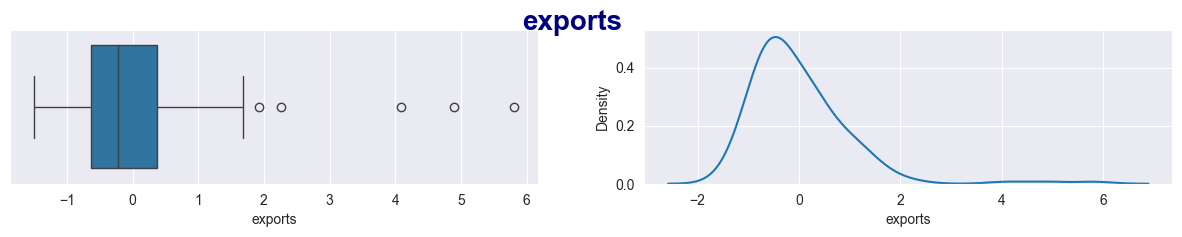

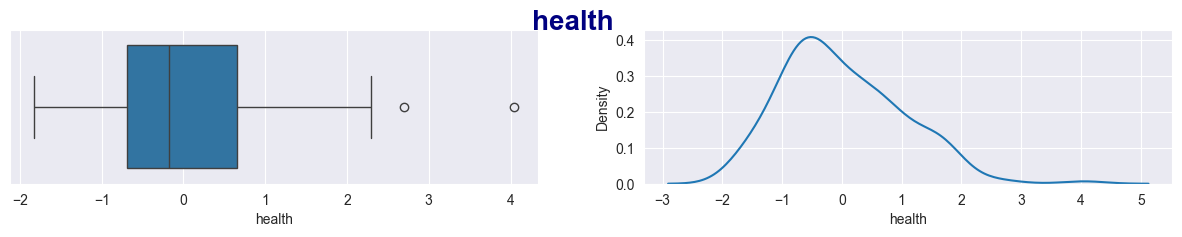

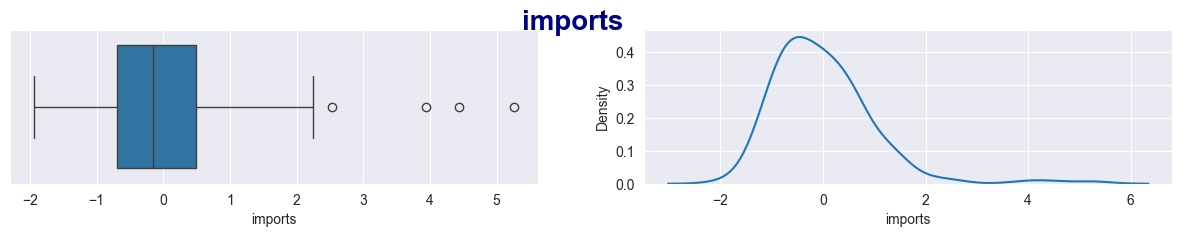

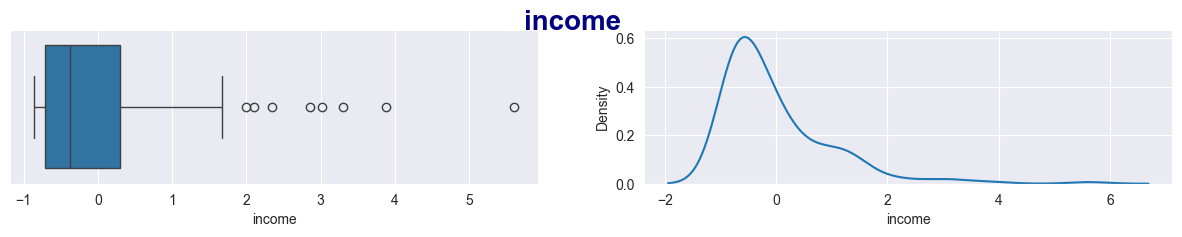

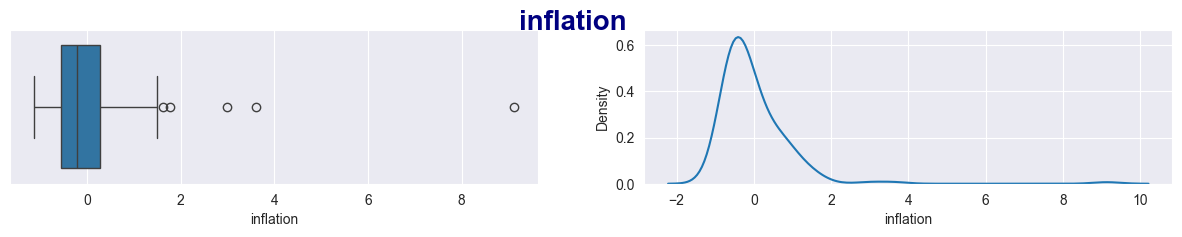

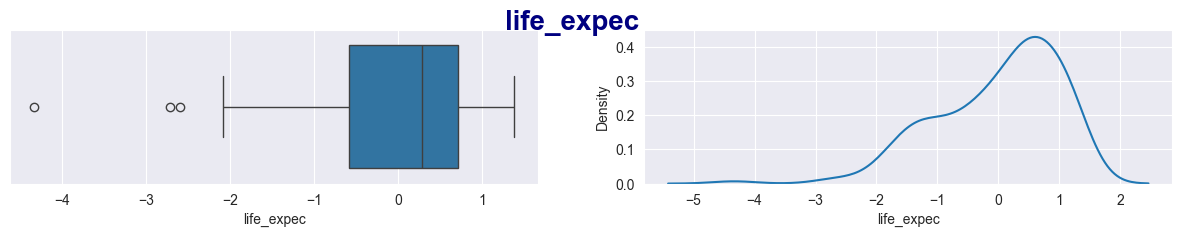

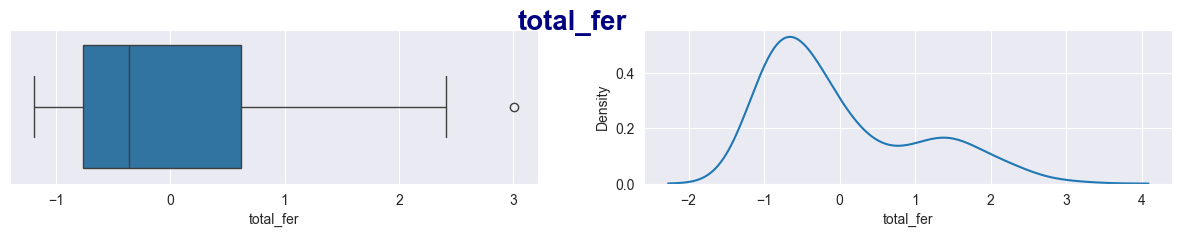

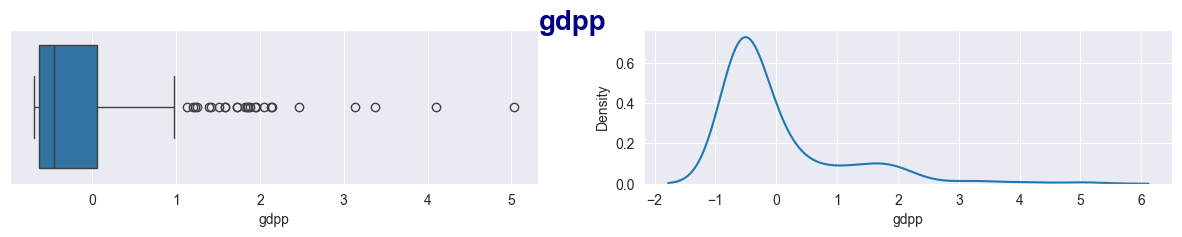

In [240]:
colmns = df_scaled.columns
for i in range(1, 9):
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(colmns[i], fontsize=20, fontweight="bold", color="navy")
    # Left Plot
    sns.boxplot(x=colmns[i], data=df_scaled, ax=ax[0])
    # Right Plot
    sns.kdeplot(df_scaled[colmns[i]], ax=ax[1])

In [142]:
print(df_scaled.columns)
print(len(df_scaled.columns))

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
9


In [143]:
pca = PCA(n_components=9)

In [217]:
pca.fit(df_scaled)

PCA(n_components=9)

In [146]:
exp = pca.explained_variance_ratio_
exp

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

###  n_component=5 has about 97% of result

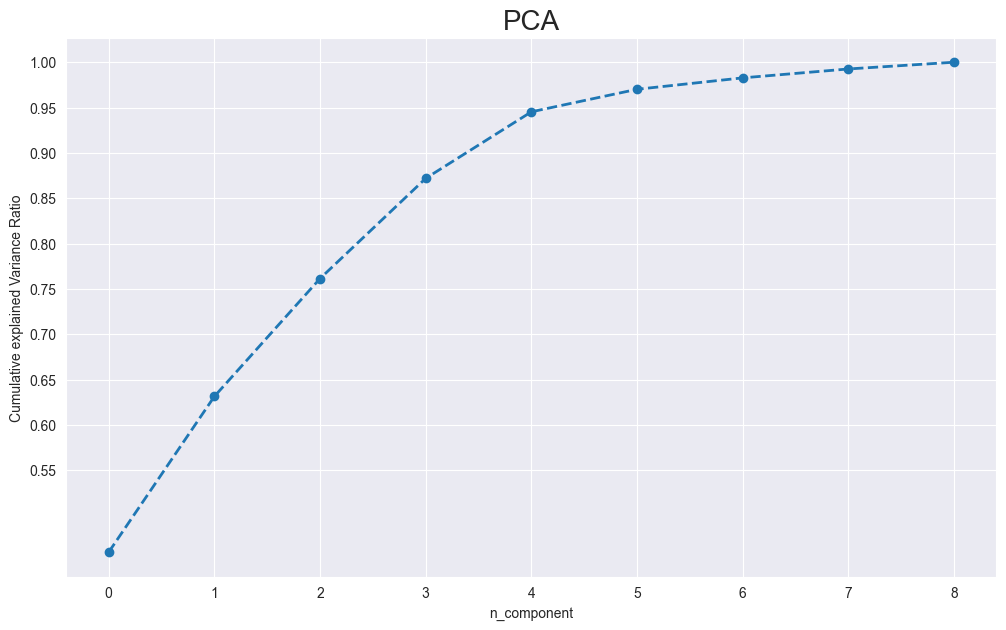

In [147]:
plt.figure(figsize=(12, 7))
plt.plot(np.cumsum(exp), linewidth=2, marker="o", linestyle="--")
plt.title("PCA", fontsize=20)
plt.xlabel("n_component")
plt.ylabel("Cumulative explained Variance Ratio")
plt.yticks(np.arange(0.55, 1.05, 0.05))
plt.show()

In [148]:
finla_pca = IncrementalPCA(n_components=5)

In [149]:
finla_pca = finla_pca.fit_transform(df_scaled)

In [150]:
finla_pca.shape

(167, 5)

In [151]:
pc = np.transpose(finla_pca)

In [152]:
corrmat = np.corrcoef(pc)

<Axes: >

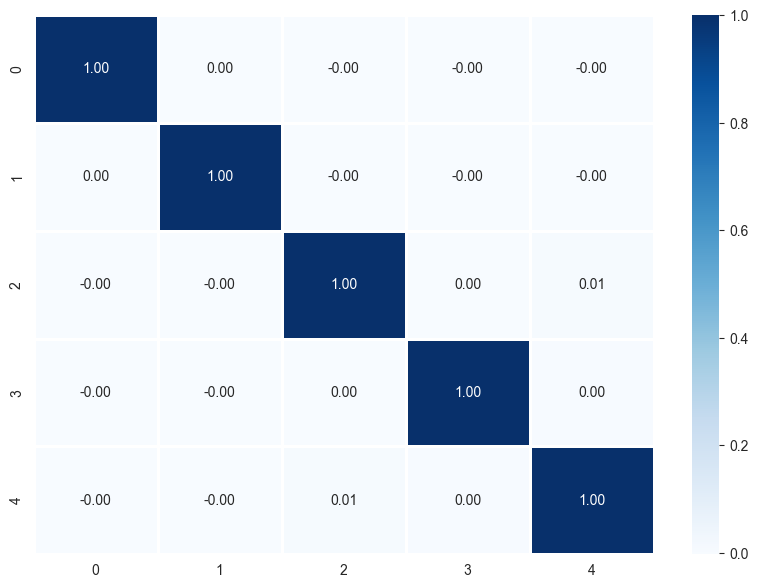

In [153]:
plt.figure(figsize=(10, 7))
sns.heatmap(corrmat, annot=True, fmt=".2f", linewidth=0.75, cmap="Blues")

In [198]:
df = pd.DataFrame(
    {
        "PC1": pc[0],
        "PC2": pc[1],
        "PC3": pc[2],
        "PC4": pc[3],
        "PC5": pc[4],
    }
)
df.sample(5)

,PC1,PC2,PC3,PC4,PC5
149,-2.371889,-1.176966,0.392827,1.159493,1.418366
148,0.925809,0.827979,0.352726,-1.591559,-0.193911
15,3.143756,0.662482,-0.659855,1.087644,0.445979
54,2.254272,-1.869086,-0.712034,1.226731,0.125576
47,-0.848191,-0.819519,0.597771,-0.737765,-0.279434


<Axes: >

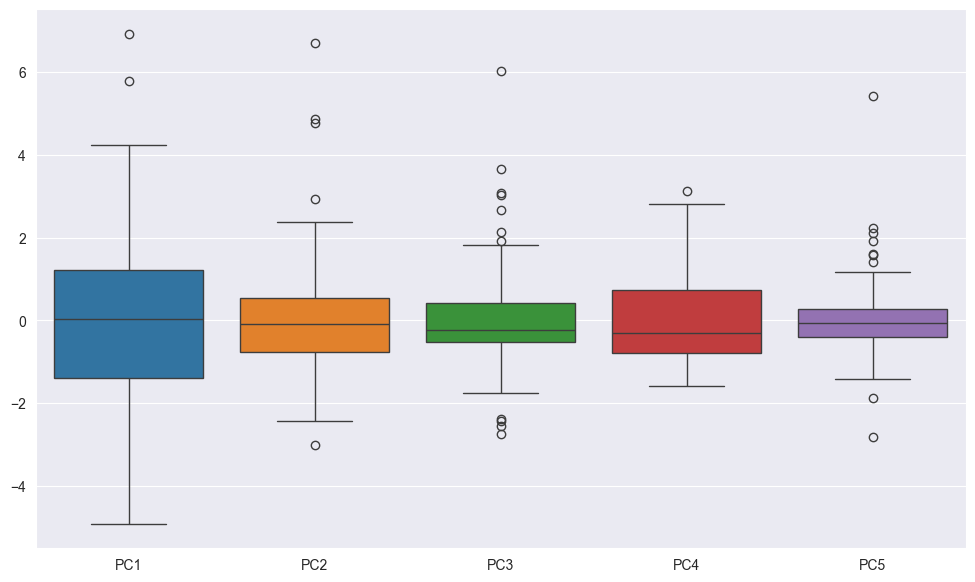

In [199]:
plt.figure(figsize=(12, 7))
sns.boxplot(df)

In [200]:
df.sample(6)

,PC1,PC2,PC3,PC4,PC5
80,-1.875019,-0.175945,-0.230613,-0.279117,-0.966929
24,0.906504,0.028728,-0.465601,-0.999039,-0.018948
53,2.458938,-1.077568,-0.096898,0.902881,-0.453489
117,1.163391,1.111175,-0.790469,-0.552013,0.565136
17,-2.673005,0.411199,-0.237232,0.289668,-1.411854
132,-3.381422,-0.234852,-1.400625,2.563263,1.038041


In [201]:
kmeans_list = []
kmeans_sil_coef = []
kmeans_calinski_score = []
kmeans_calinski_score = []
kmeans_davies_score = []

for n in range(2, 10):

    # main algorithm
    kmeans = KMeans(n_clusters=n).fit(df)
    kmeans_list.append(kmeans.inertia_)

    # Silhouette
    sil_score = silhouette_score(df, kmeans.labels_)
    kmeans_sil_coef.append(sil_score)

    # Calinski Harabasz Score
    calinski_score = calinski_harabasz_score(df, kmeans.labels_)
    kmeans_calinski_score.append(calinski_score)

    # Davies Bouldin Score
    davies_score = davies_bouldin_score(df, kmeans.labels_)
    kmeans_davies_score.append(davies_score)


k1 = KneeLocator(range(2, 10), kmeans_list, curve="convex", direction="decreasing")

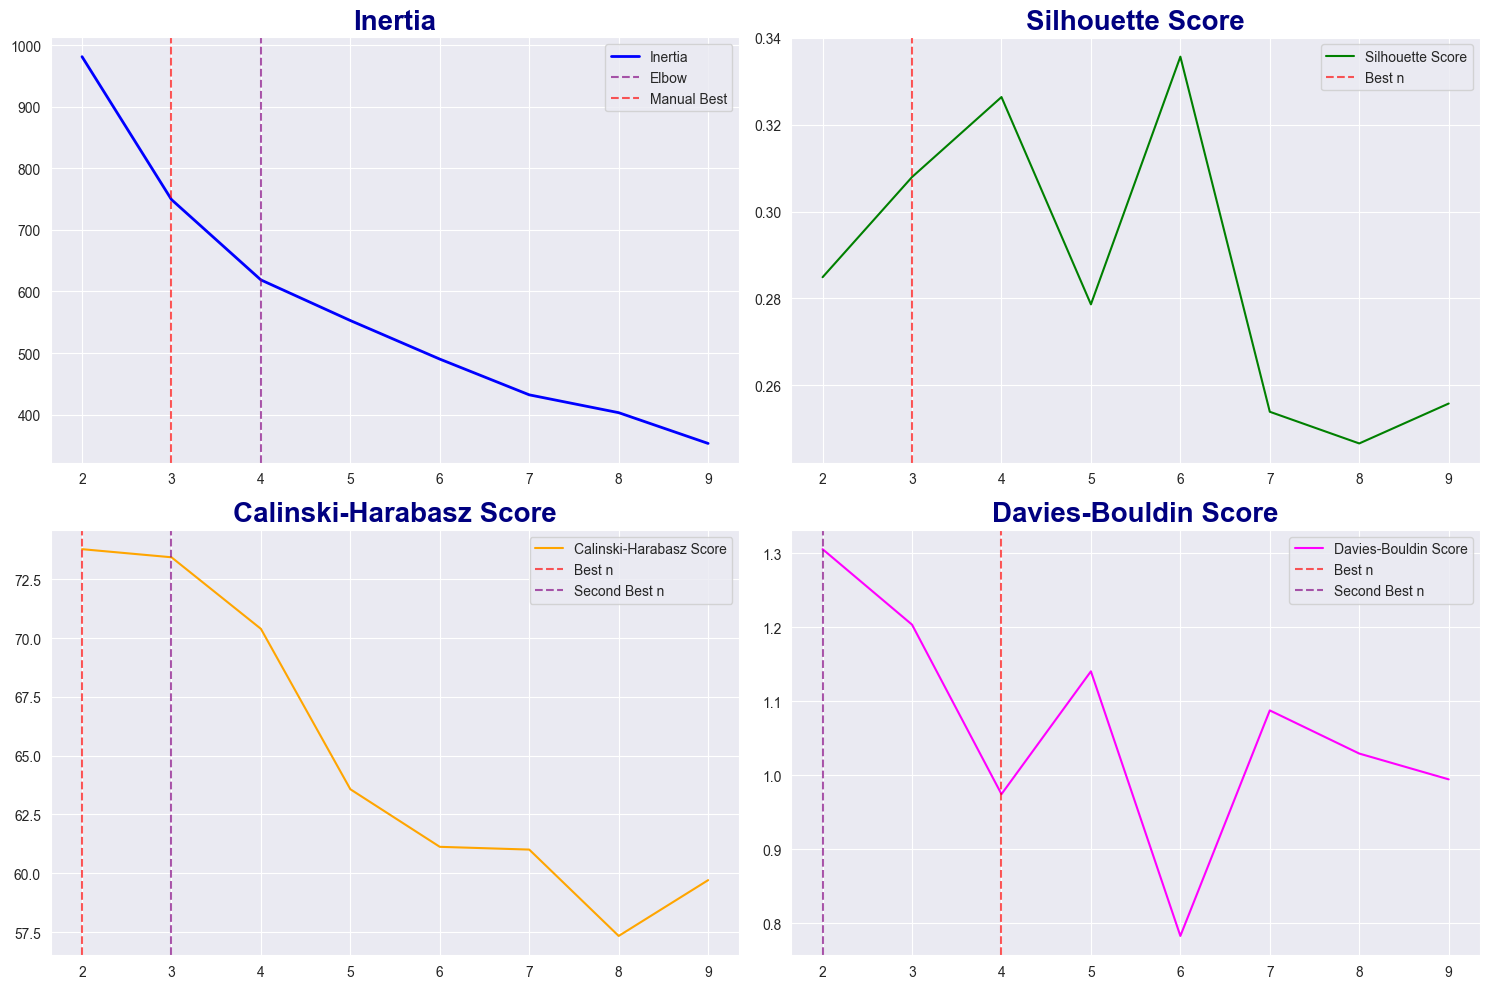

In [202]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Ax 1: Inertia (SSE)
ax[0, 0].plot(range(2, 10), kmeans_list, color="blue", label="Inertia", linewidth=2)
ax[0, 0].axvline(x=k1.elbow, ls="--", label="Elbow", color="purple", alpha=0.65)
ax[0, 0].axvline(x=3, ls="--", label="Manual Best", color="red", alpha=0.65)
ax[0, 0].set_title("Inertia", fontsize=20, fontweight=600, color="navy")
ax[0, 0].legend()

# Ax 2: Silhouette Score
ax[0, 1].plot(range(2, 10), kmeans_sil_coef, label="Silhouette Score", color="green")
ax[0, 1].axvline(x=3, ls="--", label="Best n", color="red", alpha=0.65)
ax[0, 1].set_title("Silhouette Score", fontsize=20, fontweight=600, color="navy")
ax[0, 1].legend()

# Ax 3: Calinski-Harabasz Score
ax[1, 0].plot(
    range(2, 10), kmeans_calinski_score, label="Calinski-Harabasz Score", color="orange"
)
ax[1, 0].axvline(x=2, ls="--", label="Best n", color="red", alpha=0.65)
ax[1, 0].axvline(x=3, ls="--", label="Second Best n", color="purple", alpha=0.65)
ax[1, 0].set_title("Calinski-Harabasz Score", fontsize=20, fontweight=600, color="navy")
ax[1, 0].legend()

# Ax 4: Davies-Bouldin Score
ax[1, 1].plot(
    range(2, 10), kmeans_davies_score, label="Davies-Bouldin Score", color="magenta"
)
ax[1, 1].axvline(x=4, ls="--", label="Best n", color="red", alpha=0.65)
ax[1, 1].axvline(x=2, ls="--", label="Second Best n", color="purple", alpha=0.65)
ax[1, 1].set_title("Davies-Bouldin Score", fontsize=20, fontweight=600, color="navy")
ax[1, 1].legend()

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
def hopkins(X):
    d = X.shape[1]
    # d = len(vars) # columns
    n = len(X)  # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(
            uniform(np.amin(X, axis=0), np.amax(X, axis=0), d).reshape(1, -1),
            2,
            return_distance=True,
        )
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(
            X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True
        )
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
hopkins(df)
#  high tendency to cluster.

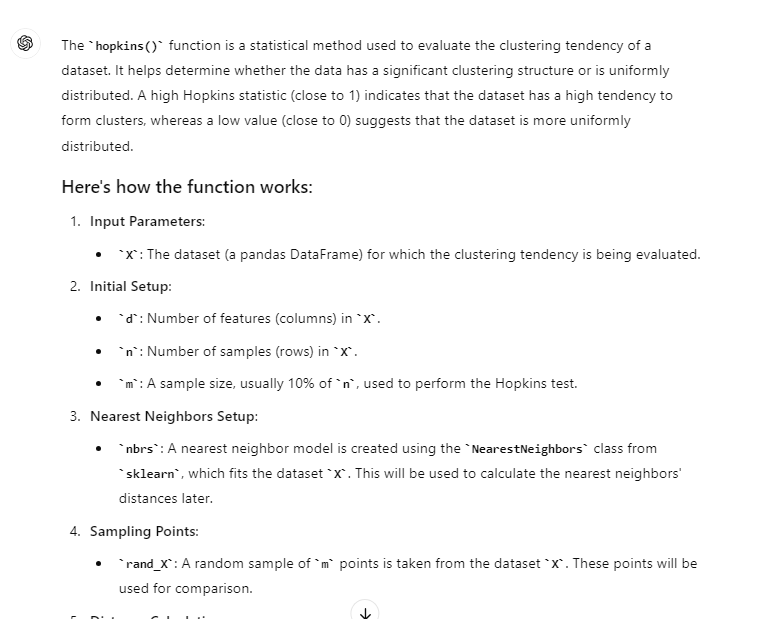

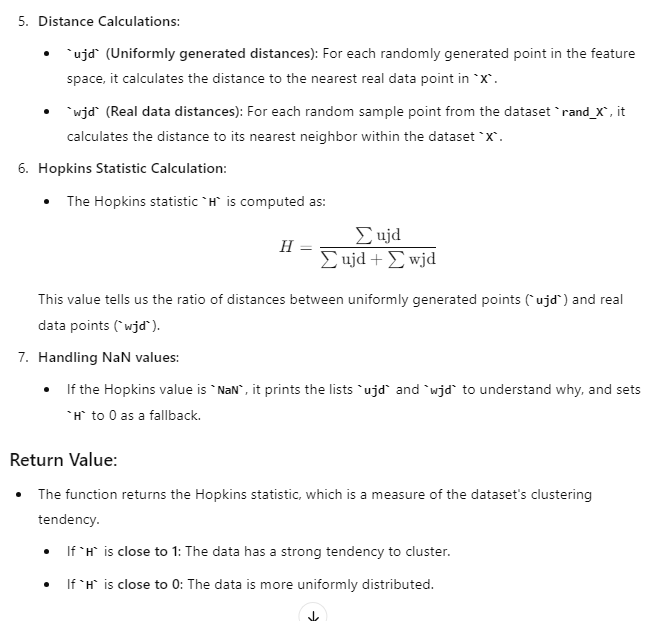

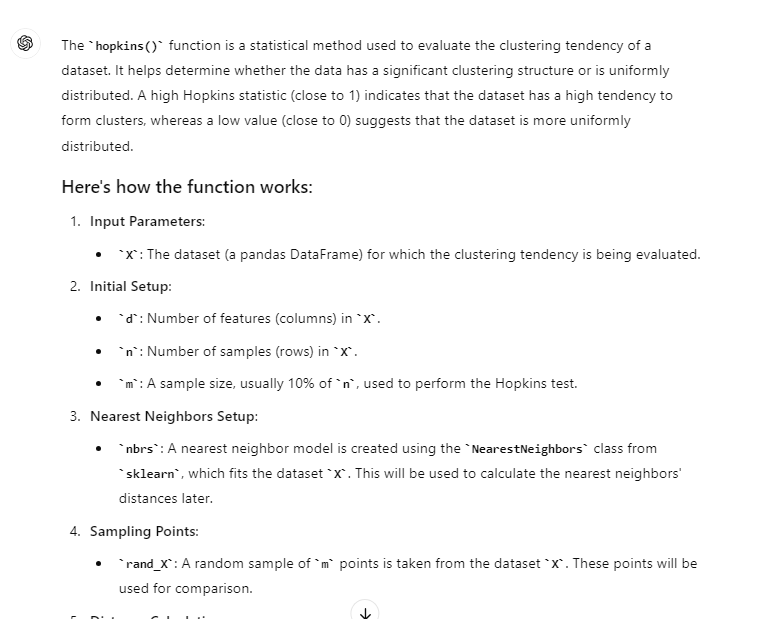

In [203]:
kmeans = KMeans(n_clusters=3)

In [204]:
kmeans = kmeans.fit(df)

In [205]:
df.insert(0, "Country", country)
df["class"] = kmeans.labels_

In [206]:
df["Need"] = df["class"]

In [207]:
poor = int(df[df.Country == "Afghanistan"]["class"])
midle = int(df[df.Country == "Iran"]["class"])
rich = int(df[df.Country == "Canada"]["class"])

In [208]:
poor_label = "Poor countries"
midle_label = "Midle countries"
rich_label = "Rich countries"

In [209]:
df.replace(
    {"Need": {poor: poor_label, midle: midle_label, rich: rich_label}}, inplace=True
)

In [210]:
df.sample(5)

,Country,PC1,PC2,PC3,PC4,PC5,class,Need
75,Italy,2.165798,-1.773979,-0.278350,0.517783,-0.289743,0,Rich countries
13,Barbados,1.081196,-0.484983,-0.658991,-0.526571,-0.008862,2,Midle countries
29,Canada,2.543776,-1.727357,-0.401760,1.334434,0.070455,0,Rich countries
34,China,0.057475,-1.188837,0.441723,-1.272651,-0.242616,2,Midle countries
130,Serbia,0.832652,-0.869344,-1.026799,-0.518551,0.959661,2,Midle countries


In [211]:
df.columns

Index(['Country', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'class', 'Need'], dtype='object')

In [212]:
df["class"].unique()

array([1, 2, 0])

In [213]:
fig = px.scatter(df, x="PC1", y="PC2", color="class")
fig.update_traces(marker_size=10)
fig.update_layout(scattermode="group", scattergap=0.75)
fig.show()

In [214]:
fig = px.scatter(df, x="PC1", y="PC3", color="class")
fig.update_traces(marker_size=10)
fig.update_layout(scattermode="group", scattergap=0.75)
fig.show()

In [216]:
fig = px.choropleth(
    df[["Country", "class"]],
    locationmode="country names",
    locations="Country",
    color=df["Need"],
    color_discrete_map={
        "Rich countries": "Green",
        "Midle countries": "LightBlue",
        "Poor countries": "Red",
    },
)

fig.update_layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
        pad=2,
    ),
)
fig.show()

### Applications of PCA:

- Image Compression: Reducing the dimensionality of image data while preserving essential information, which is crucial for image storage and transmission.

- Bioinformatics: Analyzing high-dimensional gene expression data to identify patterns and reduce noise.
Face Recognition: Extracting essential facial features for recognition tasks.

- Recommendation Systems: Reducing the dimensionality of user-item interaction data for efficient recommendation algorithms.

- Finance: Analyzing financial data to identify underlying trends and patterns.

In [120]:
# Create a sample dataset
data = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])
# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
# Create a PCA instance
pca = PCA(n_components=2)  # Specify the number of components
# Fit PCA to the standardized data
pca.fit(data_std)
# Transform the data into the reduced dimensionality
data_pca = pca.transform(data_std)
# The principal components
components = pca.components_
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# Print the results
print("Original Data:")
print(data)
print("\nStandardized Data:")
print(data_std)
print("\nPrincipal Components:")
print(components)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
print("\nData in Reduced Dimensionality:")
print(data_pca)

Original Data:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Standardized Data:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]

Principal Components:
[[-0.57735027 -0.57735027 -0.57735027]
 [ 0.         -0.70710678  0.70710678]]

Explained Variance Ratio:
[1. 0.]

Data in Reduced Dimensionality:
[[ 2.12132034e+00 -4.36708632e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [-2.12132034e+00  4.36708632e-16]]
